In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,6]

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
df=pd.read_csv('Country-data.csv')
df.head()


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [18]:
df.shape

(167, 10)

In [19]:
country=df['country']
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [20]:
df=df.drop('country',axis=1)
df.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [21]:
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

<Axes: >

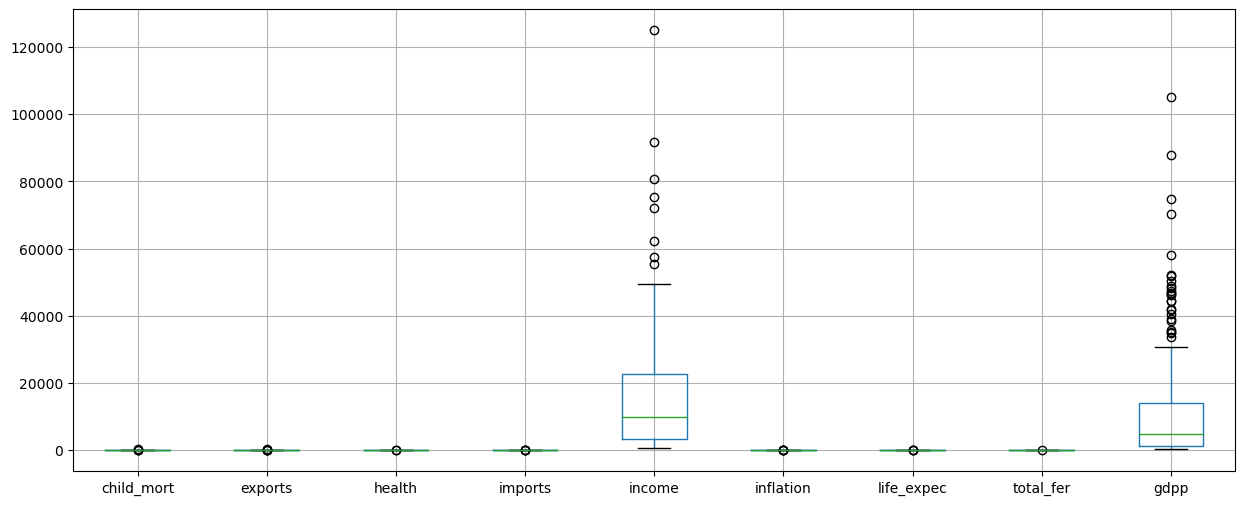

In [22]:
df.boxplot()

In [23]:
df.nunique()

child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [24]:
for i in ['income','gdpp']:
    
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    for j in df[i]:
        if j<ll:
            df[i]=df[i].replace(j,ll)
        if j>ul:
            df[i]=df[i].replace(j,ul)

In [25]:
df.boxplot()

<Axes: >

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mmax=MinMaxScaler()

In [28]:
df=pd.DataFrame(mmax.fit_transform(df),columns=df.columns)
df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.019490   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.181489   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.239318   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.103021   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.360038   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.009788  
1   0.078864  0.117298  
2   0.274448  0.128545  
3   0.790221  0.100277  
4   0.154574  0.363810

In [29]:
wcss=[]
max_range=9
for k in range(2,max_range):
    kmeans=KMeans(n_clusters=k,random_state=42)
    model=kmeans.fit(df)
    wcss.append(model.inertia_)

In [30]:
scores=[]
for k in range(2,max_range):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(df)
    score=silhouette_score(df,labels)
    scores.append(score)

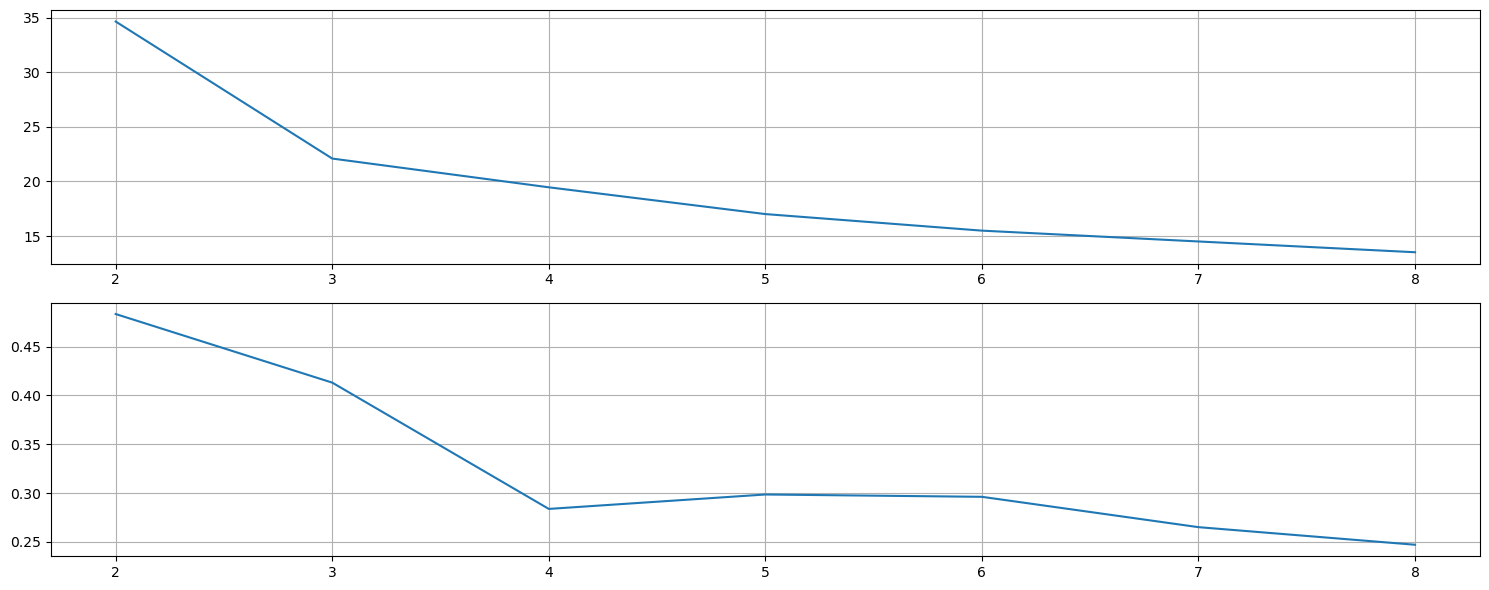

In [31]:
plt.subplot(2,1,1)
plt.plot(range(2,max_range),wcss)
plt.grid()
plt.subplot(2,1,2)
plt.plot(range(2,max_range),scores)
plt.grid()

plt.tight_layout()
plt.show()

In [32]:
linkage_matrix = linkage(df, method='ward')

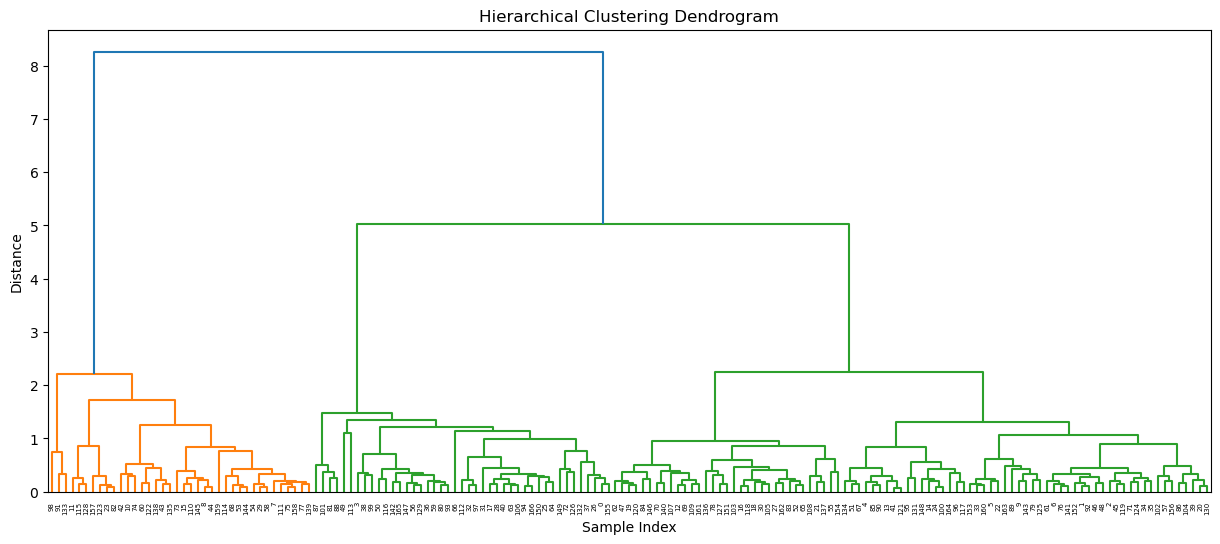

In [33]:
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [34]:
kmeans=KMeans(n_clusters=2,random_state=42)
model=kmeans.fit(df)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [35]:
df['clusters']=pd.Series(model.labels_)
df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.019490   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.181489   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.239318   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.103021   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.360038   0.052213    0.881657   

   total_fer      gdpp  clusters  
0   0.736593  0.009788         1  
1   0.078864  0.117298         1  
2   0.274448  0.128545         1  
3   0.790221  0.100277         1  
4   0.154574  0.363810         1

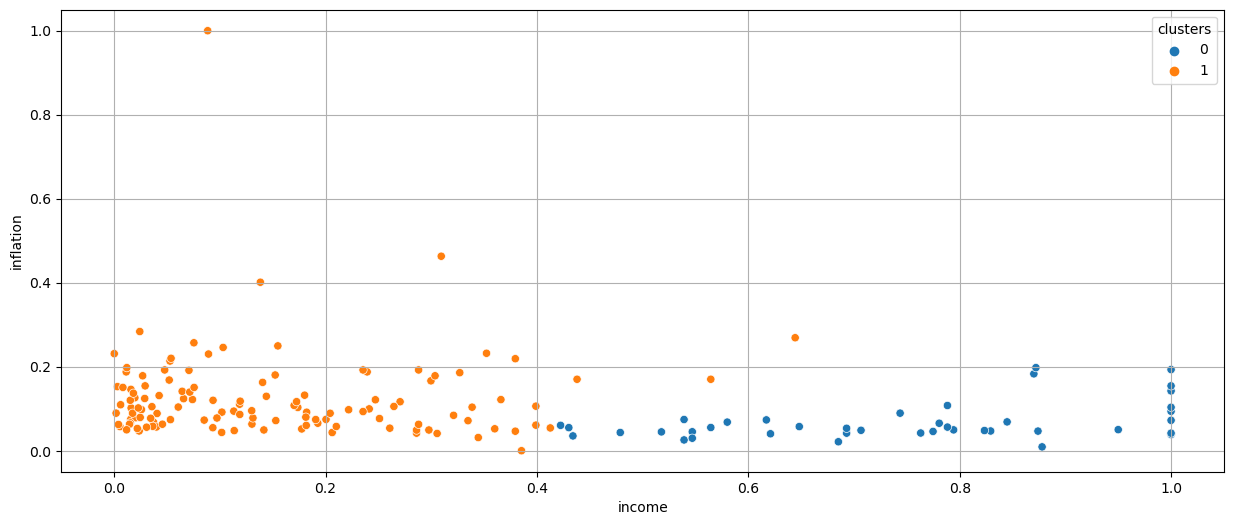

In [36]:
sns.scatterplot(x='income',y='inflation',data=df,hue='clusters')
plt.grid()
plt.show()

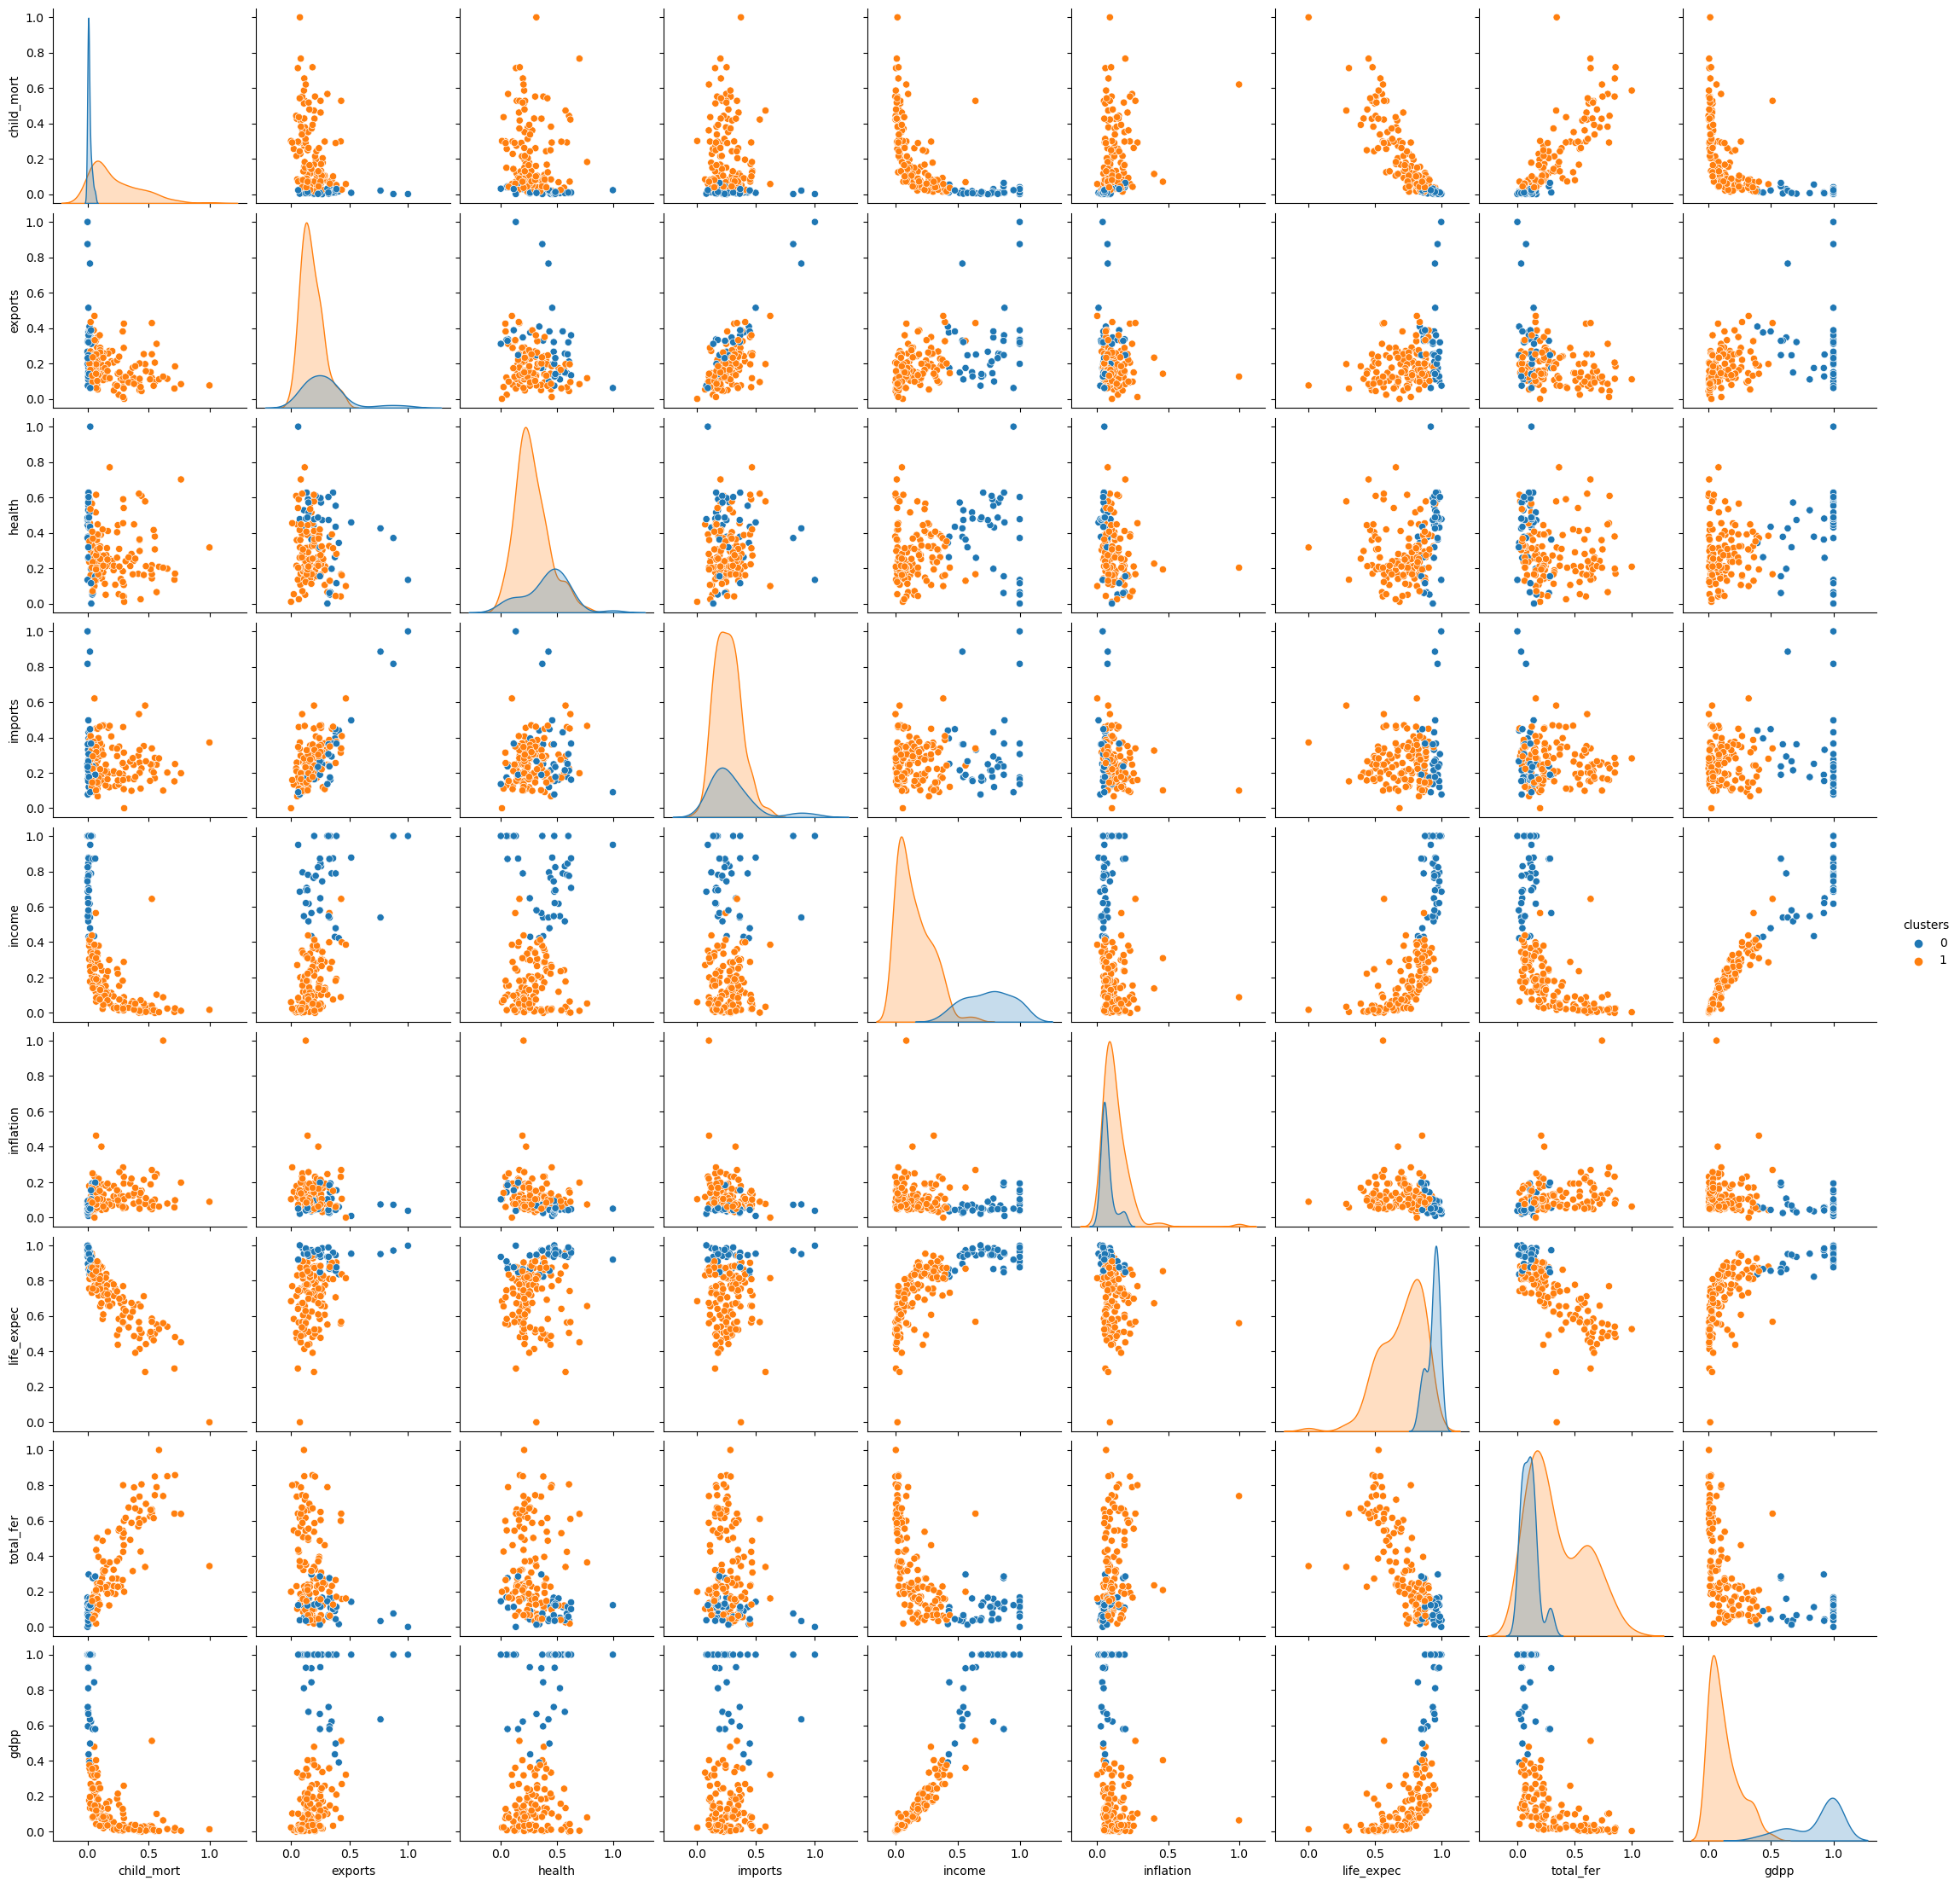

In [37]:
sns.pairplot(df,hue='clusters')
plt.show()

In [38]:
df['country']=pd.Series(country)
df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.019490   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.181489   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.239318   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.103021   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.360038   0.052213    0.881657   

   total_fer      gdpp  clusters              country  
0   0.736593  0.009788         1          Afghanistan  
1   0.078864  0.117298         1              Albania  
2   0.274448  0.128545         1              Algeria  
3   0.790221  0.100277         1               Angola  
4   0.154574  0.363810         1  Antigua and Barbuda

In [39]:
cols=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [40]:
df[df['clusters']==0]['country'].values

array(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg',
       'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman',
       'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [41]:
df[df['clusters']==1]['country'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Madagascar', 'Malawi'

In [42]:
import plotly.express as px

In [43]:
px.scatter_3d(data_frame=df,x='income',y='inflation',z='gdpp',color='clusters',hover_name='country')

In [44]:
from sklearn.manifold import TSNE

In [45]:
tsne=TSNE(n_components=2,perplexity=0.30)


In [46]:
tsne.fit_transform(df[cols])


array([[  26.911224 ,   27.27716  ],
       [  58.157307 ,    2.8001387],
       [ -66.24551  , -108.161545 ],
       [   7.397902 ,   18.425741 ],
       [-100.48815  ,  -24.394167 ],
       [  -4.946313 ,   93.884735 ],
       [  34.842247 ,    7.8228307],
       [  41.13676  ,  -33.670403 ],
       [ -53.516216 ,   12.845573 ],
       [  11.087677 ,  -13.559791 ],
       [  74.24329  ,  109.158485 ],
       [ -43.10723  ,  -27.199276 ],
       [-170.44745  ,  -64.85073  ],
       [ 122.08582  ,  -45.50648  ],
       [   8.581609 , -170.62407  ],
       [ -48.729202 ,  -68.833885 ],
       [ -65.78098  , -153.93004  ],
       [-175.42941  ,   46.514385 ],
       [ -44.901054 ,   29.686247 ],
       [-134.97446  ,   -4.7846975],
       [ -28.790442 , -170.27199  ],
       [  37.232777 ,  -10.693707 ],
       [ -28.67164  ,  -42.353764 ],
       [  51.18103  ,  -18.06767  ],
       [  -6.402688 ,  -36.852016 ],
       [ -10.397574 ,   53.34378  ],
       [  28.654781 ,   29.399166 ],
 

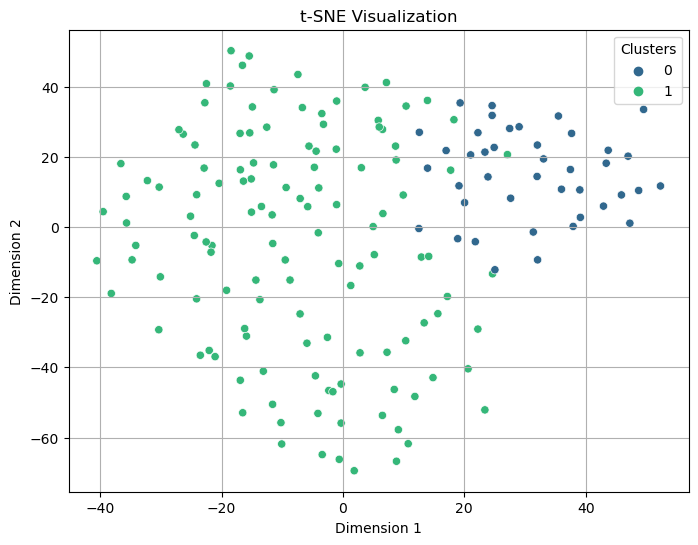

In [47]:
tsne = TSNE(n_components=3, random_state=42)
x_tsne = tsne.fit_transform(df[cols])

# Create DataFrame for visualization
tsne_df = pd.DataFrame({'Dimension 1': x_tsne[:, 0], 'Dimension 2': x_tsne[:, 1], 'Clusters': model.labels_})

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=tsne_df,hue='Clusters', palette='viridis', legend='full')
plt.grid()
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
